In [1]:
import numpy as np
import numpy.linalg as la
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
from main import *
%load_ext autoreload
%autoreload 2

In [2]:
SAMPLE_NUMBER = 3
image_dir = Path(f'./samples/{SAMPLE_NUMBER}')
COORDS = np.load(image_dir/'points.npy')
IMAGES = [x for x in sorted(image_dir.iterdir()) if x.suffix == ".jpg"]

im1_pts = COORDS[:, 0, :]
im2_pts = COORDS[:, 1, :]
print(im1_pts.shape, im2_pts.shape)

(8, 2) (8, 2)


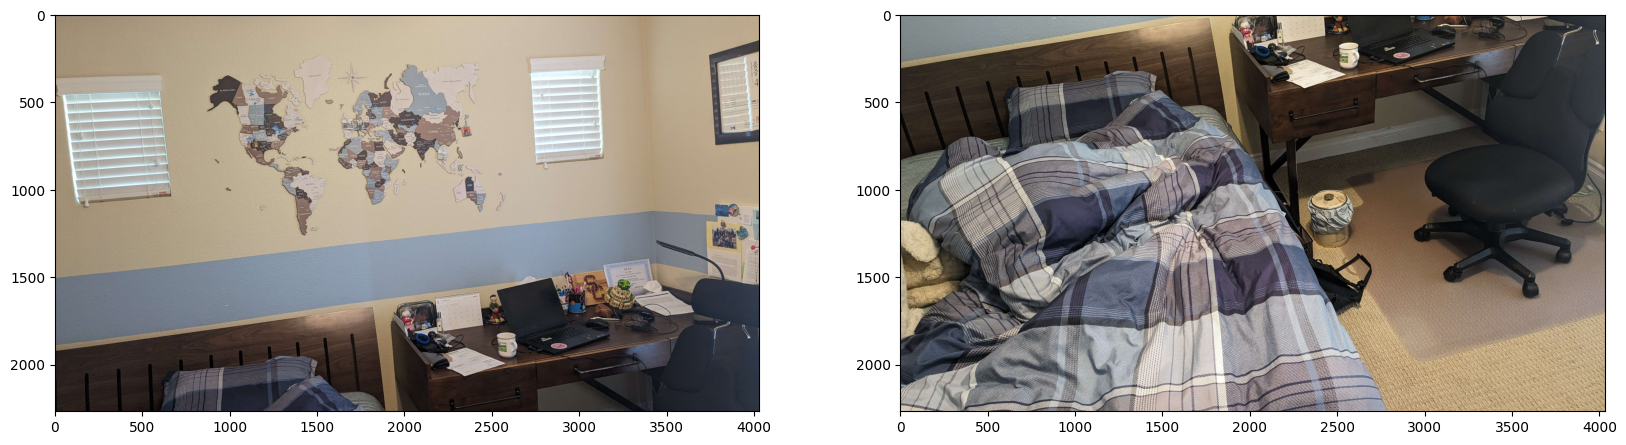

In [5]:
im1 = cv2.imread(str(IMAGES[0]))
im2 = cv2.imread(str(IMAGES[1]))

# show both images
fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].imshow(cv2.cvtColor(im1, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))

In [6]:
H = computeH(im1_pts, im2_pts)
H

array([[ 9.21579472e-01, -2.92071444e-01,  1.70528675e+02],
       [ 6.97726786e-03,  6.60429925e-01,  1.62744412e+03],
       [-5.20316144e-06, -1.37665209e-04,  1.00000000e+00]])

In [7]:
images = [im1, im2]
Hs = [np.eye(3), H]
stitched = stitch_images(get_warped_images(images, Hs))

[(0, 0, 4032, 2268), (-716, 1627, 4835, 4730)]
(-716, 0) (5551, 4730)


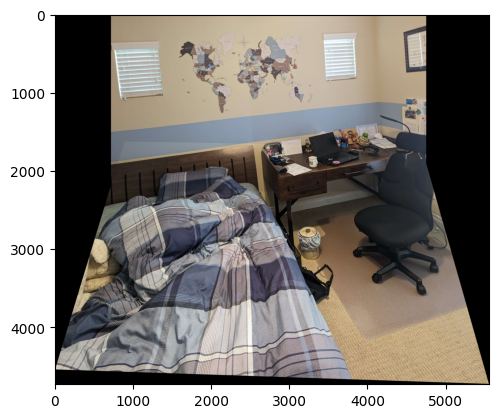

In [8]:
plt.imshow(cv2.cvtColor(stitched, cv2.COLOR_BGR2RGB))